In [2]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

import sys
#sys.path.append("C:\\Users\\Ryan\\Documents\\GitHub\\Differential-Dynamic-Microscopy---Python\\")
sys.path.append("C:\\Users\\rmcgorty\\Documents\\GitHub\\Differential-Dynamic-Microscopy---Python\\")
import tiff_file
import ddm_clean as ddm

C:\Users\rmcgorty\Documents\GitHub\Differential-Dynamic-Microscopy---Python\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
C:\Users\rmcgorty\Documents\GitHub\Differential-Dynamic-Microscopy---Python\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
C:\Users\rmcgorty\Documents\GitHub\Differential-Dynamic-Microscopy---Python\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Imports not working? Make sure to grab the [DDM repository from GitHub](https://github.com/rmcgorty/Differential-Dynamic-Microscopy---Python). 

Don't know what all those scipy.ndimage functions are? [Check out the documentation](https://docs.scipy.org/doc/scipy/reference/ndimage.html). 

In [3]:
def im_corr(image, filter=False, filtersize=80):
    '''
    This function computes the image correlation. 
    Inputs:
        image - the 2D matrix of the image
        filter (optional) - boolean, defaults to False. Whether or not to filter image using the uniform filter
        filtersize (optional) - defaults to 80. Size of filter
    Outputs:
        corr_im - the correlation (same size as input image)
        rav_corr - radially averaged correlation
    '''
    
    #If the 'filter' optional argument is true, then filter the image
    if filter:
        image = filtimage(image, filtersize = filtersize)
        
    #Subtract of the mean and divide by standard deviation (so that the maximum
    #  of the correlation function will be 1)
    image = 1.0*image-image.mean()
    image = image/image.std()
    
    #Use Fourier transforms to calculate the correlation
    corr_im = abs(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    
    #Compute radial average
    rav_corr = ddm.newRadav(corr_im)
    
    
    return corr_im, rav_corr

def filtimage(image, filtersize=80):
    '''
    Filters image using the scipy.ndimage function uniform_filter
    '''
    image = image*1.0 - uf(image,filtersize)
    return image

In [4]:
data_dir = "Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-06-17\\AMT\\nomyosin\\20200617_zstack_LK16yoyo_AMT_568actinRTubulin_40msEXPO_488OD4_1\\"
data_file = "20200617_zstack_LK16yoyo_AMT_568actinRTubulin_40msEXPO_488OD4_1_MMStack_Pos0.ome.tif"

In [5]:
im_even = tiff_file.imread(data_dir+data_file,key=[60])
print("Shape of ims is %i,%i" % im_even.shape)

Shape of ims is 266,1024


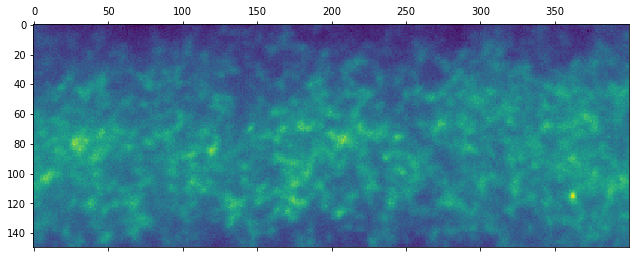

In [6]:
xstart = 215
xstop = xstart+400
ystart = 38+25
ystop = ystart+200-50

im_even_2 = im_even[ystart:ystop,xstart:xstop]

plt.matshow(im_even_2)

In [7]:
data_dir = "Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-06-17\\AMT\\yesmyosin\\20200617_LK16YOYO_AMT_568A_RT_samespot\\"
data_file = "20200617_LK16YOYO_AMT_568A_RT_samespot_MMStack_Pos0.ome.tif"

In [8]:
im_clump = tiff_file.imread(data_dir+data_file,key=[0])
print("Shape of ims is %i,%i" % im_clump.shape)

Shape of ims is 266,1024


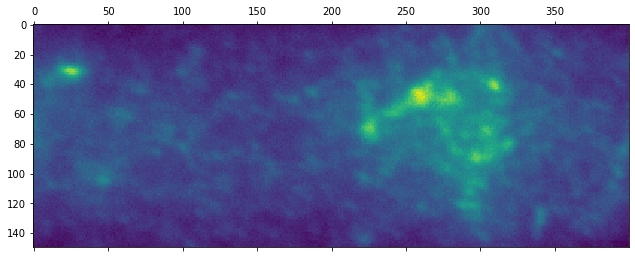

In [9]:
xstart = 298
xstop = xstart+400
ystart = 2
ystop = ystart+200-50

im_clump_2 = im_clump[ystart:ystop,xstart:xstop]

plt.matshow(im_clump_2)

In [10]:
corr_im_even, corr_rad_even = im_corr(im_even_2,filter=True,filtersize=50)
corr_im_clump, corr_rad_clump = im_corr(im_clump_2,filter=True,filtersize=50)

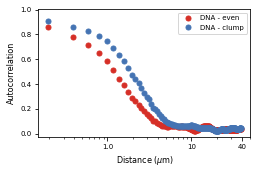

In [11]:
cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(corr_rad_even))*0.196
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
plt.semilogx(xvalues, gf1d(corr_rad_even,1),'.',ms=markerSize,c=cmap(0.1),label="DNA - even")
plt.plot(xvalues, gf1d(corr_rad_clump,1),'.',ms=markerSize,c=cmap(0.9),label="DNA - clump")
plt.xlabel("Distance ($\mu$m)",fontsize=8)
plt.ylabel("Autocorrelation",fontsize=8)
plt.legend(loc=0,fontsize=7)

#plt.xlim(0.14, 20)

ax.set_xticks([1.0, 10, 40])
ax.set_xticklabels(['1.0','10','40'], fontsize=7)

plt.savefig("autocorr_DNA.svg",dpi=600)

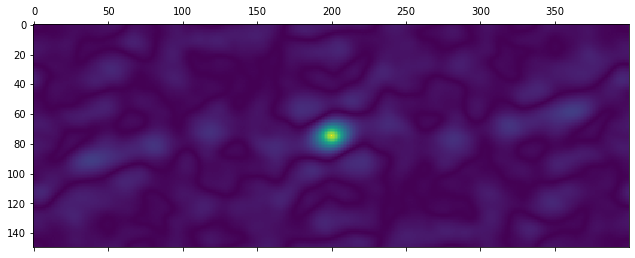

In [12]:
plt.matshow(corr_im_clump)

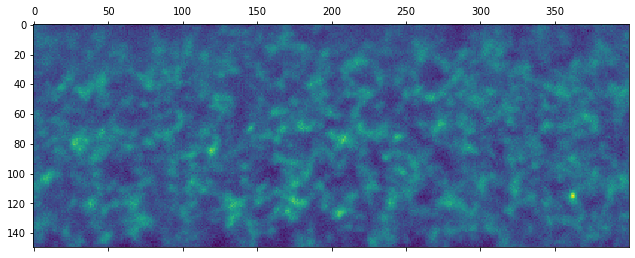

In [13]:
plt.matshow(filtimage(im_even_2,filtersize=50))

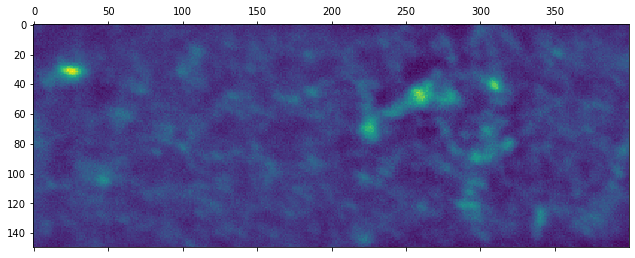

In [14]:
plt.matshow(filtimage(im_clump_2,filtersize=50))